In [1]:
#Neccessary Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import datetime
import yahoo_fin.stock_info as yahoo_fin
from bs4 import BeautifulSoup
import requests

In [2]:
#Get's the Stock Sticker the user wants
user_stock = input("Pick a Dividend Paying Stock's Ticker Symbol: ")
user_stock = user_stock.upper()

Pick a Dividend Paying Stock's Ticker Symbol: bac


In [3]:
#Gets the string format for Dates
def Dates(date):
    dateString = ''
    for val in str(date):
        if(val == ' '):
            break
        elif(val == '-'):
            dateString = dateString + '/'   
        else:
            dateString = dateString + val
            
    return dateString

In [4]:
#This Function is for the 3 valuation ratios
def ValuationRatios(soup):
    finder = []
    holder = []
    holder2 = []
    holder3 = []
    
    for value in soup.find_all('td',style = 'text-align:center;'):
        finder.append(value.text)
      
    #Gets the PE Ratios
    for index in range(7,len(finder),4):
        holder.append(float(finder[index]))
        
    #Gets the date of the PE Ratios  
    for index in range(4,len(finder),4):
        holder2.append(str(finder[index]))
        
    for index in range(6,len(finder),4):
        i = finder[index][1:]
        holder3.append(float(i))
        
        
        
    #Gets the dataframe for the PEs
    PEdataframe = pd.DataFrame({'Dates': holder2,
                               'PEs':holder,
                               'EPS':holder3})
        
    return PEdataframe

In [5]:
#Gets the soup for the link provided
def SoupGetter(searchVar):
    source = requests.get(searchVar).text
    soup = BeautifulSoup(source,'lxml')
    return soup

In [6]:
# This function will give us the point that's closest to the sample mean to estimate with
def BoxplotMeanDot(data):
    closestMean =  abs(statistics.mean(PEs) - data[0])
    for num in range(0,len(data),1):
        if(abs(statistics.mean(data) - data[num]) < closestMean):
            closestMean = abs(statistics.mean(data) - data[num])
            PEC = data[num]
        else:
            pass
        
    return float(PEC)

In [7]:
#converts strings into floats
def locator(data_array):
    desired_array2 = []
    desired_array3 = []
            
# Converts the data that is negative into a readable negative strings            
    for value in data_array:
        if(value.startswith('(') == True):
            value = value[1:-1]
            value = '-'+ value
        else:
            pass
        desired_array2.append(value)
        
# Converts the into useable numerical values        
    for item in desired_array2:
        if(str(item[-1]) == 'B'):
            item = float(item[0:-1]) * 1000000000
        elif(str(item[-1]) == 'M'):
            item = float(item[0:-1]) * 1000000
        elif(str(item[-1]) == 'T'):
            item = float(item[0:-1]) * 1000000000000
        elif(str(item[-1]) == 'K'):
            item = float(item[0:-1]) * 1000
        elif(str(item) == '-'):
            item = np.NaN
        else:
            temp = ''
            for char in item:
                item = item.split(',')
                for i in item:
                    temp += i
                item = float(temp)
        desired_array3.append(item)
            
    return desired_array3

In [8]:
#Transform nan to zero for the SaleGains variable
def NaNZero(array):
    x = []
    for i in array:
        if(i is np.nan):
            x.append(0)
        else:
            x.append(i)
    return x

In [9]:
#Gets stock price over a certain of time the user wants

#Gets today's date
today_time = datetime.datetime.now()
today_date = str(Dates(pd.to_datetime(today_time,yearfirst = True)))
print(today_date)

#Gets the date 20 Years ago
twentyYr_date = Dates(datetime.datetime.now() - datetime.timedelta(days = 20 * 365))

#Gets the years for the financial graphs
year = int(datetime.datetime.now().year) - 1
years = [year,year-1,year-2,year-3,year-4]
years = [str(i) + '/12/31' for i in years]
years = np.flip(years)
ffoX = datetime.datetime.strptime(str(datetime.datetime.now().year) + '/12/31','%Y/%m/%d')
print(ffoX)

2021/08/28
2021-12-31 00:00:00


In [10]:
#Gets the neccessary Stonk Data Prices
stonkPrices = yahoo_fin.get_data(user_stock,start_date = str(twentyYr_date),end_date = today_date)
stonkPrices['dates'] = pd.to_datetime(stonkPrices.index)
print(stonkPrices)

                 open       high        low      close   adjclose    volume  \
2001-09-04  30.375000  31.395000  30.264999  30.955000  18.936567  13949200   
2001-09-05  30.625000  31.049999  30.434999  30.645000  18.918055  15066600   
2001-09-06  30.450001  30.575001  29.375000  29.889999  18.451965  17680400   
2001-09-07  29.275000  29.809999  28.940001  29.295000  18.084660  16347200   
2001-09-10  29.075001  29.325001  28.660000  28.825001  17.794514  16255600   
...               ...        ...        ...        ...        ...       ...   
2021-08-23  40.630001  41.099998  40.599998  40.910000  40.910000  35364500   
2021-08-24  41.099998  41.680000  41.040001  41.480000  41.480000  35579300   
2021-08-25  41.660000  42.450001  41.540001  42.150002  42.150002  51219900   
2021-08-26  42.500000  42.840000  42.020000  42.040001  42.040001  41184500   
2021-08-27  42.119999  42.650002  41.939999  42.490002  42.490002  46455500   

           ticker      dates  
2001-09-04    BAC 20

In [11]:
#Gets the dividend data and the percent changes
dividends = yahoo_fin.get_dividends(user_stock,start_date = '2000-01-01' ,end_date = '2021-01-01',index_as_date = False)

#Gets dividends by the year
divX = dividends.groupby(dividends.date.dt.year)
divPays = []
divYears = []
for key, item in divX:
    divPays.append(sum(item['dividend']))
    divYears.append(key)

dividendData = pd.DataFrame({'Years': divYears,
                            'Dividends': divPays})
print(dividendData)

    Years  Dividends
0    2000       1.03
1    2001       1.14
2    2002       1.22
3    2003       1.44
4    2004       1.70
5    2005       1.90
6    2006       2.12
7    2007       2.40
8    2008       2.24
9    2009       0.04
10   2010       0.04
11   2011       0.04
12   2012       0.04
13   2013       0.04
14   2014       0.12
15   2015       0.20
16   2016       0.25
17   2017       0.39
18   2018       0.54
19   2019       0.66
20   2020       0.72


In [12]:
#Gets Essential Balance Sheet data 
BalanceSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/balance-sheet'.format(user_stock))

index = 0

#Puts all BalanceSheet data in a array
BalanceData = []
for i in BalanceSoup.find_all('div',class_ = 'cell__content'):
    BalanceData.append(str(i.text))


try:
    
    #List of desired lines of a balance sheet 
    desiredBalance = ['Total Current Assets','Total Assets','Total Current Liabilities','Total Liabilities',
                     'Long-Term Debt','Total Equity',"Total Shareholders' Equity",'Inventories',
                     'Interest Expense','Income Tax']
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
            
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                      'Total_Current_Assets':locator(list(SortedBalanceSheet[0:5])),
                                     'Total_Assets':locator(list(SortedBalanceSheet[5:10])),
                                     'Total_Current_Liabilities':locator(list(SortedBalanceSheet[10:15])),
                                      'Total_Liabilities':locator(list(SortedBalanceSheet[15:20])),
                                    'Total_Debt':locator(list(SortedBalanceSheet[20:25])),
                                    'Total_Equity':locator(list(SortedBalanceSheet[25:30])),
                                    "Shareholder's_Equity":locator(list(SortedBalanceSheet[30:35])),
                                    'Inventories':locator(list(SortedBalanceSheet[35:40])),
                                         })
    
#The except is for financials or REITS
except:
    
    #For loop to work through balance sheet data
    desiredBalance = ['Total Assets','Total Liabilities','Total Debt','Total Equity',"Total Shareholders' Equity"]
    
    #For loop to work through balance sheet data
    SortedBalanceSheet = []
    for item in desiredBalance: 
        for index in range(0,len(BalanceData),1):
            if((BalanceData[index - 1] ==  item) and (BalanceData[index] == item)):
                for number in range(1,6,1):
                    SortedBalanceSheet.append(BalanceData[index + number])
            else:
                pass
        
    #Makes balance sheet into a pandas dataframe
    BalanceSheetDataFrame = pd.DataFrame({'Years':years,
                                    'Total_Current_Assets': [np.nan,np.nan,np.nan,np.nan,np.nan],
                                    'Total_Assets':locator(list(SortedBalanceSheet[0:5])),
                                    'Total_Current_Liabilities': [np.nan,np.nan,np.nan,np.nan,np.nan],
                                    'Total_Liabilities':locator(list(SortedBalanceSheet[5:10])),
                                    'Total_Debt':locator(list(SortedBalanceSheet[10:15])),
                                    'Total_Equity':locator(list(SortedBalanceSheet[15:20])),
                                    "Shareholder's_Equity":locator(list(SortedBalanceSheet[20:25]))
                                     })
    
print(BalanceSheetDataFrame)

        Years  Total_Current_Assets  Total_Assets  Total_Current_Liabilities  \
0  2016/12/31                   NaN  2.200000e+12                        NaN   
1  2017/12/31                   NaN  2.290000e+12                        NaN   
2  2018/12/31                   NaN  2.360000e+12                        NaN   
3  2019/12/31                   NaN  2.440000e+12                        NaN   
4  2020/12/31                   NaN  2.830000e+12                        NaN   

   Total_Liabilities    Total_Debt  Total_Equity  Shareholder's_Equity  
0       1.930000e+12  4.110600e+11  2.662000e+11          2.662000e+11  
1       2.020000e+12  4.369300e+11  2.671500e+11          2.671500e+11  
2       2.100000e+12  4.365700e+11  2.653300e+11          2.653300e+11  
3       2.180000e+12  4.402600e+11  2.648100e+11          2.648100e+11  
4       2.560000e+12  4.630500e+11  2.729200e+11          2.729200e+11  


In [13]:
IncomeSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/income'.format(user_stock))

#Puts all Income Statement data in a array
IncomeData = []
for i in IncomeSoup.find_all('div',class_ = 'cell__content'):
    IncomeData.append(str(i.text))
    
# For non financial companies
try:
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Depreciation & Amortization Expense',
                     'Extra Items & Gain/Loss Sale Of Assets','Basic Shares Outstanding','Interest Expense',
                     'Income Tax']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass 

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass
    

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                          'Net_Income': locator(list(SortedIncome[0:5])),
                                          'Revenue': locator(list(SortedIncome[5:10])),
                                          'Depreciation&Amortization': locator(list(SortedIncome[10:15])),
                                          'SaleGains': NaNZero(locator(list(SortedIncome[15:20]))),
                                          'Shares':locator(list(SortedIncome[20:25])),
                                          'Interest_Expense':locator(list(SortedIncome[25:30])),
                                          'Income_Tax':locator(list(SortedIncome[30:35]))
                                         })

    IncomeDataFrame['FFO'] = (IncomeDataFrame['Net_Income'] + IncomeDataFrame['Depreciation&Amortization'] - IncomeDataFrame['SaleGains']) / IncomeDataFrame['Shares']

except:
    #List of desired lines of a Income Statement
    desiredIncome = ['Net Income','Sales/Revenue','Total Internest Expense','Income Taxes']

    #For loop to work through Income Statement data
    SortedIncome = []
    for item in desiredIncome: 
        for index in range(0,len(IncomeData),1):
            if((IncomeData[index - 1] ==  item) and (IncomeData[index] == item)):
                for number in range(1,6,1):
                    SortedIncome.append(IncomeData[index + number])
            else:
                pass        

    if(len(SortedIncome) < 10):
        for i in range(0,5,1):
            SortedIncome.append('0')
    else:
        pass

    #Makes Income Statement into a pandas dataframe
    IncomeDataFrame = pd.DataFrame({'Years': years,
                                    'Net_Income': locator(list(SortedIncome[0:5])),
                                    'Revenue':locator(list(SortedIncome[5:10])),
                                         })


print(IncomeDataFrame)
print(SortedIncome)

        Years    Net_Income       Revenue
0  2016/12/31  1.782000e+10  9.960000e+09
1  2017/12/31  1.823000e+10  1.291000e+10
2  2018/12/31  2.815000e+10  1.861000e+10
3  2019/12/31  2.743000e+10  2.235000e+10
4  2020/12/31  1.789000e+10  8.230000e+09
['17.82B', '18.23B', '28.15B', '27.43B', '17.89B', '9.96B', '12.91B', '18.61B', '22.35B', '8.23B', '7.2B', '10.98B', '6.44B', '5.32B', '1.1B']


In [14]:
#Gets the Yearly Cashflow Statement
CashSoup = SoupGetter(searchVar = 'https://www.marketwatch.com/investing/stock/{0}/financials/cash-flow'.format(user_stock))
#Puts all Income Statement data in a array
CashData = []
for i in CashSoup.find_all('div',class_ = 'cell__content'):
    CashData.append(str(i.text))

#List of desired lines of a Income Statement
desiredCash = ['Net Investing Cash Flow','Cash Dividends Paid - Total','Free Cash Flow','Net Operating Cash Flow']

#For loop to work through Income Statement data
SortedCash = []
for item in desiredCash: 
    for index in range(0,len(CashData),1):
        if((CashData[index - 1] ==  item) and (CashData[index] == item)):
            for number in range(1,6,1):
                SortedCash.append(CashData[index + number])
        else:
            pass        
    
#Makes Income Statement into a pandas dataframe
CashFlowDataFrame = pd.DataFrame({'Net_Investing_Cashflow': locator(list(SortedCash[0:5])),\
                                  'Dividends': locator(list(SortedCash[5:10])),
                                  'Free_Cash_Flow': locator(list(SortedCash[10:15])),
                                  'Net_Operating_Cashflow' : locator(list(SortedCash[15:20]))
                                 })
print(CashFlowDataFrame)

   Net_Investing_Cashflow     Dividends  Free_Cash_Flow  \
0           -6.574000e+10 -4.190000e+09    2.096000e+10   
1           -6.916000e+10 -5.700000e+09    2.749000e+10   
2           -9.424000e+10 -6.900000e+09    6.229000e+10   
3           -7.139000e+10 -5.930000e+09    5.254000e+10   
4           -1.613300e+11 -7.730000e+09    2.166000e+10   

   Net_Operating_Cashflow  
0            2.096000e+10  
1            2.749000e+10  
2            6.229000e+10  
3            5.254000e+10  
4            2.166000e+10  


In [15]:
#Gets the prices for FFO Dates to have a FFO Boxplot
try:
    FFOdates = yahoo_fin.get_data(user_stock,start_date = str(IncomeDataFrame['Years'][0]) ,
                                    end_date = ffoX,index_as_date = False)

    #Convert the Years in income statement into timestamp
    datesFFO = [datetime.datetime.strptime(IncomeDataFrame['Years'][i],'%Y/%m/%d') for i in range(0,len(IncomeDataFrame['Years']),1)]
    datesFFO.append(ffoX)

    meter = 0
    pFFO = []
    for i in range(0,len(FFOdates),1):
        if(FFOdates['date'][i] > datesFFO[meter+1]):
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
            meter += 1
        #The meter increment stops if it's 5
        elif(meter == 5):
            break
        else:
            pffo = FFOdates['close'][i]/IncomeDataFrame['FFO'][meter]
            pFFO.append(pffo)
except:
    pass

print(pFFO)

[]


In [16]:
# Gets the current PE ratio for future PE boxplot using 12 month trailing EPS, sum of last 4 quarterly EPS

#Webscrapes for the name of stock
name_soup = SoupGetter(searchVar = 'https://www.cnbc.com/quotes/{0}?qsearchterm={0}'.format(user_stock))

#Gets the company name we need to webscrape
CompanyName = name_soup.find(class_ = 'QuoteStrip-quoteTitle').text.lower()
splitName = CompanyName.split(' ')

try:
    compName = splitName[0]
    
except:
    compName = CompanyName.replace(' ','-')
    
print(compName)

#Webscrapes for pe ratios
PBs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-book'.format(user_stock,compName)))

BookValue = np.flip(PBs['EPS'])
neoBookDates = np.flip(PBs['Dates'])

neoPBs = pd.DataFrame({'Dates':neoBookDates,
                      'BookValues':BookValue})

neoPBs.reset_index(inplace = True)

#Webscrapes for ps ratios
PSs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/price-sales'.format(user_stock,compName)))

#Webscrapes the PEs in the data
PEs = ValuationRatios(SoupGetter(searchVar = 'https://www.macrotrends.net/stocks/charts/{0}/{1}/pe-ratio'.format(user_stock,compName)))

neoEPS = np.flip(PEs['EPS'])
neoDates = np.flip(PEs['Dates'])

neoPEs = pd.DataFrame({'Dates':neoDates,
                      'EPS':neoEPS})

neoPEs.reset_index(inplace = True)

print(neoPBs.tail(5))
print(neoPEs.tail(5))
print(neoEPS.tail(5))

bank
    index       Dates  BookValues
57      4  2020-06-30       30.66
58      3  2020-09-30       31.04
59      2  2020-12-31       31.55
60      1  2021-03-31       31.90
61      0  2021-06-30       32.65
    index       Dates   EPS
54      4  2020-06-30  2.07
55      3  2020-09-30  2.02
56      2  2020-12-31  1.87
57      1  2021-03-31  2.33
58      0  2021-06-30  2.99
4    2.07
3    2.02
2    1.87
1    2.33
0    2.99
Name: EPS, dtype: float64


In [17]:
#This is where we get the TTM PE ratios for all closing prices

#This is the dataframe of the prices from the lowest EPS' date to the most recent
PEdates = yahoo_fin.get_data(user_stock,start_date = str(PEs['Dates'][len(PEs) - 1]),end_date = str(PEs['Dates'][0]))

PEdates.reset_index(inplace = True)
PEdates['Date'] = PEdates['index']
del PEdates['index']

#Convert neoPEs into date type array
PEyears = [datetime.datetime.strptime(neoPEs['Dates'][i],'%Y-%m-%d') for i in range(0,len(neoPEs['Dates']),1)]

#Gets the PE ratios by date
meter = 0
pes = []
earningsShare = []
for i in range(0,len(PEdates['Date']),1):
    if(PEdates['Date'][i] > PEyears[meter+1]):
        pe = PEdates['close'][i]/neoPEs['EPS'][meter]
        pes.append(pe)
        earningsShare.append(neoPEs['EPS'][meter])
        meter += 1
    elif(meter == len(PEyears)):
        break
    else:
        pe = PEdates['close'][i]/neoPEs['EPS'][meter]
        pes.append(pe)
        earningsShare.append(neoPEs['EPS'][meter])
        
#assigns ttm PEs & EPS per trading date
PEdates['PE'] = pes 
PEdates['EPS'] = earningsShare 

#Assigns today's current PE Ratio
denom = float(neoPEs['EPS'][len(neoPEs['EPS']) - 1])
currPE = stonkPrices['close'][-1]/ denom
print(currPE)

14.210702902497255


<ipython-input-17-02e1270b78a1>:26: RuntimeWarning: divide by zero encountered in double_scalars
  pe = PEdates['close'][i]/neoPEs['EPS'][meter]
<ipython-input-17-02e1270b78a1>:19: RuntimeWarning: divide by zero encountered in double_scalars
  pe = PEdates['close'][i]/neoPEs['EPS'][meter]


In [18]:
#This is where we get the PB Ratios for each closing price

#Get the prices divided by the book value to get P/B ratios
PBdates = yahoo_fin.get_data(user_stock, start_date = PBs['Dates'][len(PBs) - 1], end_date = PBs['Dates'][0])

PBdates.reset_index(inplace = True)
PBdates['Date'] = PBdates['index']
del PBdates['index']

#Convert neoPBs into date type array
PByears = [datetime.datetime.strptime(neoPBs['Dates'][i],'%Y-%m-%d') for i in range(0,len(neoPBs['Dates']),1)]

#Gets the PB ratios by date
meter = 0
pbs = []
bookValues = []
for i in range(0,len(PBdates['Date']),1):
    if(PBdates['Date'][i] > PByears[meter+1]):
        pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
        pbs.append(pe)
        bookValues.append(neoPBs['BookValues'][meter])
        meter += 1
    elif(meter == len(PByears)):
        break
    else:
        pb = PBdates['close'][i]/neoPBs['BookValues'][meter]
        pbs.append(pb)
        bookValues.append(neoPBs['BookValues'][meter])
        
#assigns ttm PBs & BookValues per trading date
PBdates['PB'] = pbs
PBdates['BookValues'] = bookValues

#Assigns today's current PB Ratio
denom = float(neoPBs['BookValues'][len(neoPBs['BookValues']) - 1])
currPB = stonkPrices['close'][-1]/ denom
print(currPB)

1.3013783056191974


In [19]:
#Gets the Insider Trading Data from openinsider.com
insiderSoup = SoupGetter(searchVar = f'http://openinsider.com/search?q={user_stock}')

#Puts all Insider data in a array
insiderData = []
for i in insiderSoup.find_all('td',align = 'right'):
    insiderData.append(str(i.text))
    
#Removes all of the unneccessary tags & empty spaces from array
insiderData = insiderData[20:] 
inData = []
for val in insiderData:
    if((val == '') or (val == 'D') or (val == 'A') or (val == 'E') or (val == 'M') or (val == 'DM')):
        pass
    else:
        inData.append(val)
    
#Gets the dates for insider trading
inDates = []
for num in range(1,len(inData),7):
    inDates.append(inData[num])
    
#Gets the Value of Stock Bought or sold
inSale = []
for num in range(6,len(inData),7):
    inSale.append(inData[num])
    
insiderSale = []
for string in inSale:
    temp = ''
    for char in string:
        if((char == '$') or (char == ',')):
            pass
        else:
            temp += char
    insiderSale.append(float(temp))

insiderSale = np.flip(insiderSale)
    
#Creates the dataframe for insider trading info
insiderDF = pd.DataFrame({'Date':inDates,
                         'Exchange':insiderSale
                         })

aggregation_functions = {'Exchange': 'sum','Date': 'first'}
insiderDF = insiderDF.groupby(insiderDF['Date']).aggregate(aggregation_functions)

#Gets the colors for Insider Trading
inColors = []
for num in insiderDF['Exchange']:
    if(num <= 0):
        inColors.append('r')
    else:
        inColors.append('mediumseagreen')
        
insiderDF['Color'] = inColors
        
print(insiderDF)

               Exchange        Date           Color
Date                                               
2019-10-17   -3198400.0  2019-10-17               r
2019-10-23    -357060.0  2019-10-23               r
2020-07-20   -5126270.0  2020-07-20               r
2020-07-23  337061890.0  2020-07-23  mediumseagreen
2020-07-28  522043203.0  2020-07-28  mediumseagreen
2020-07-31  397865938.0  2020-07-31  mediumseagreen
2021-02-25  813327610.0  2021-02-25  mediumseagreen
2021-04-30    -203645.0  2021-04-30               r
2021-08-06   -1209200.0  2021-08-06               r


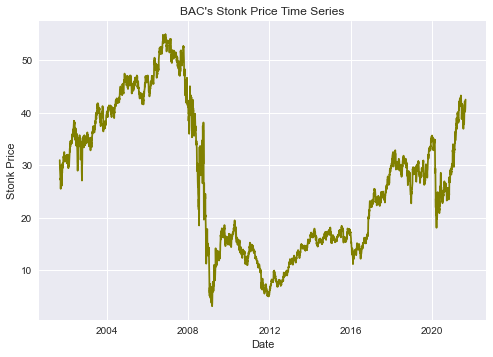

In [20]:
#Look at the stock price throughout history
plt.style.use('seaborn')
plt.ylabel('Stonk Price')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Stonk Price Time Series")
plt.plot(stonkPrices['dates'],stonkPrices['close'],color = 'olive')

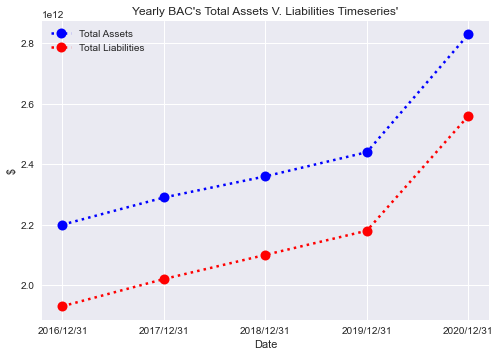

In [21]:
#Now to get the graphs for Yearly Balance Sheet data 

#Plots Assets
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Assets'],color = 'b',
         linewidth = 2.5,marker = '.', markersize = 20, linestyle = 'dotted', label = 'Total Assets')
plt.ylabel('$')
plt.xlabel('Date')

#Plots Liabilities
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Liabilities'],color = 'r',linewidth = 2.5,marker = '.',
        markersize = 20, linestyle = 'dotted', label = 'Total Liabilities')

plt.title(f"Yearly {user_stock}'s Total Assets V. Liabilities Timeseries'")
plt.legend(loc = 'best',shadow = True)

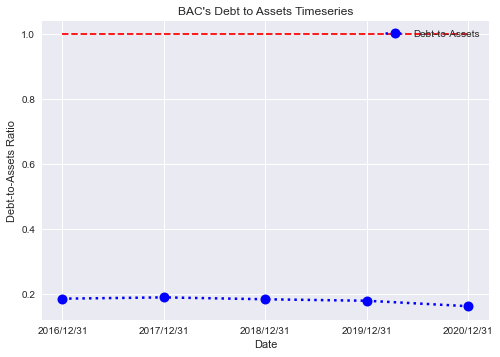

In [22]:
#Debt to Assets Ratio
DebtAssets = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    DebtAssets.append(numerator/denominator)
    
#Plots debt to assets ratio
plt.plot(BalanceSheetDataFrame['Years'],DebtAssets,color = 'b', linewidth = 2.5, marker = '.',
         markersize = 20,linestyle = 'dotted', label = 'Debt-to-Assets')
plt.ylabel('Debt-to-Assets Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt to Assets Timeseries")
plt.legend(loc = 'best',shadow = True)
plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'r')

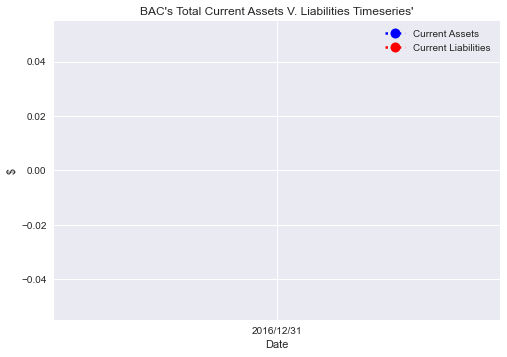

In [23]:
#Plots Assets
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Assets'],color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Current Assets')
plt.ylabel('$')
plt.xlabel('Date')

#Plots Liabilities
plt.plot(BalanceSheetDataFrame['Years'],BalanceSheetDataFrame['Total_Current_Liabilities'],color = 'r',
         linewidth = 2.5,marker = '.', markersize = 20,linestyle = 'dotted', label = 'Current Liabilities')

plt.title(f"{user_stock}'s Total Current Assets V. Liabilities Timeseries'")
plt.legend(loc = 'best',shadow = True)

In [24]:
#Timeseries Graph for Quick Ratio
try:
    Acid = []
    for val in range(0,len(BalanceSheetDataFrame['Total_Current_Assets']),1):
        numerator = BalanceSheetDataFrame['Total_Current_Assets'][val] - BalanceSheetDataFrame['Inventories'][val]
        denominator = BalanceSheetDataFrame['Total_Current_Liabilities'][val]
        Acid.append(numerator/denominator)

    #Plots Debt to Equity Timseseries
    plt.plot(BalanceSheetDataFrame['Years'],Acid,color = 'b',linewidth = 2.5,
             marker = '.', markersize = 20, linestyle = 'dotted', label = 'Quick Ratio')

    plt.hlines(1,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')
    plt.ylabel('Quick Ratio')
    plt.xlabel('Date')
    plt.title(f"{user_stock}'s Quick Ratio Timeseries'")
    plt.legend(loc = 'best',shadow = True)
except:
    pass

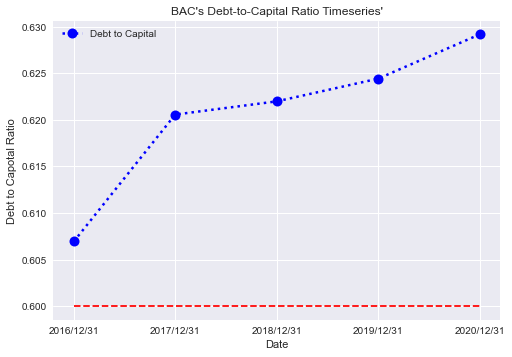

In [25]:
#Debt-to-Capital  Ratio Timeseries, should be below 1 to show they're under leveraged
DebtCap = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Debt'][val] + BalanceSheetDataFrame['Total_Equity'][val]
    DebtCap.append((numerator/denominator))
    
#Plots Debt to Capital Timseseries
plt.plot(BalanceSheetDataFrame['Years'],DebtCap,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Debt to Capital')
plt.ylabel('Debt to Capotal Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt-to-Capital Ratio Timeseries'")
plt.legend(loc = 'best',shadow = True)
plt.hlines(.6,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'r')

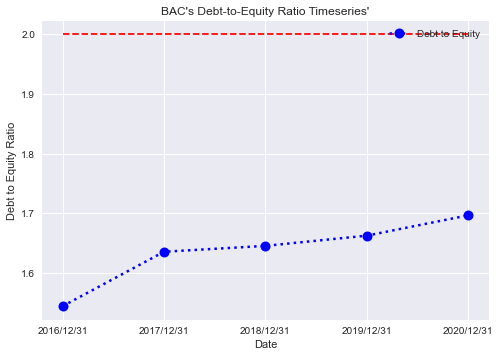

In [26]:
#Gets the Debt to Equity Ratio Timeseries
DebtEquity = []
for val in range(0,len(BalanceSheetDataFrame['Total_Debt']),1):
    numerator = BalanceSheetDataFrame['Total_Debt'][val]
    denominator = BalanceSheetDataFrame['Total_Equity'][val]
    DebtEquity.append((numerator/denominator))
    
#Plots Debt to Equity Timseseries
plt.plot(BalanceSheetDataFrame['Years'],DebtEquity,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Debt to Equity')
plt.ylabel('Debt to Equity Ratio')
plt.xlabel('Date')
plt.title(f"{user_stock}'s Debt-to-Equity Ratio Timeseries'")
plt.legend(loc = 'best',shadow = True)
plt.hlines(2,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'r')

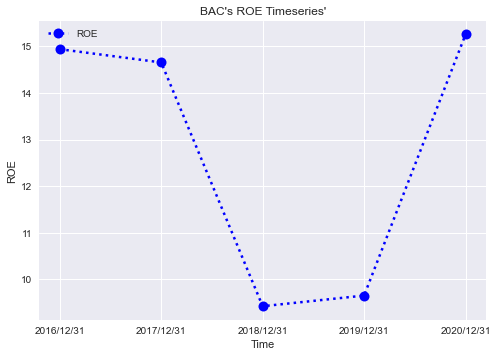

In [27]:
#Gets the Timeseries of the ROE for the stock
roe = []
for val in range(0,len(IncomeDataFrame['Net_Income']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    roe.append((numerator/denominator))
    
#Plots the ROE
plt.plot(BalanceSheetDataFrame['Years'],roe,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'ROE')
plt.title(f"{user_stock}'s ROA Timeseries'")
plt.title(f"{user_stock}'s ROE Timeseries'")
plt.xlabel('Time')
plt.ylabel('ROE')
plt.legend(loc = 'best',shadow = True)

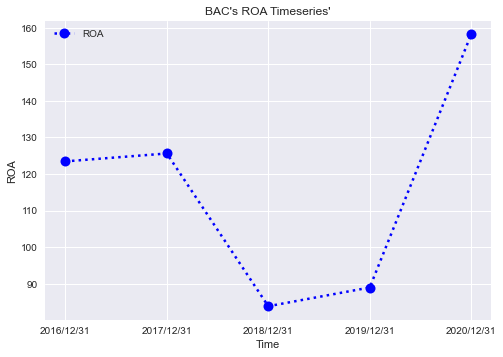

In [28]:
#Gets the Return on Assets timeseries for the stock
incomeAssets = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame['Total_Assets'][val]
    denominator = IncomeDataFrame['Net_Income'][val]
    incomeAssets.append((numerator/denominator))
    
#Plots the ROA
plt.plot(BalanceSheetDataFrame['Years'],incomeAssets,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'ROA')
plt.title(f"{user_stock}'s ROA Timeseries'")
plt.xlabel('Time')
plt.ylabel('ROA')
plt.legend(loc = 'best',shadow = True)

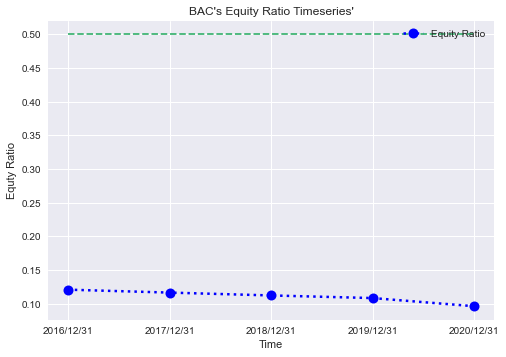

In [29]:
#Gets the Equity Ratio Timeseries
equityRatio = []
for val in range(0,len(BalanceSheetDataFrame['Total_Assets']),1):
    numerator = BalanceSheetDataFrame["Shareholder's_Equity"][val]
    denominator = BalanceSheetDataFrame['Total_Assets'][val]
    equityRatio.append((numerator/denominator))
    
#Plots the Equity Ratio
plt.plot(BalanceSheetDataFrame['Years'],equityRatio,color = 'b',linewidth = 2.5,
         marker = '.', markersize = 20, linestyle = 'dotted', label = 'Equity Ratio')
plt.title(f"{user_stock}'s Equity Ratio Timeseries'")
plt.xlabel('Time')
plt.ylabel('Equty Ratio')
plt.legend(loc = 'best',shadow = True)
plt.hlines(.5,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')

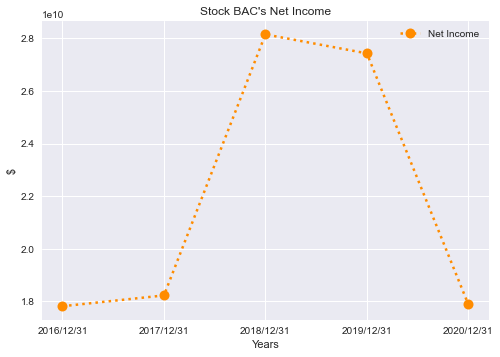

In [30]:
#Now to get the graph for the Net Income
plt.plot(IncomeDataFrame['Years'],IncomeDataFrame['Net_Income'],color = 'darkorange',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Net Income'
        )

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Net Income".format(user_stock))
plt.legend(loc = 'best',shadow = True)

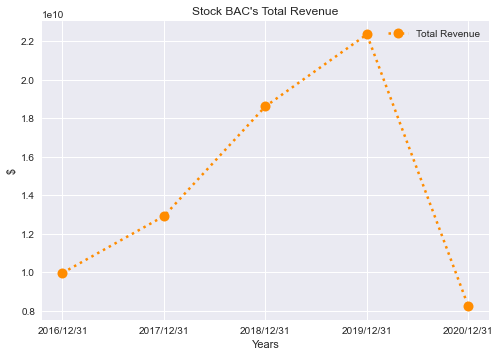

In [31]:
#Gets the Total Revenue of the Company
plt.plot(IncomeDataFrame['Years'],IncomeDataFrame['Revenue'],color = 'darkorange',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Total Revenue')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Total Revenue".format(user_stock))
plt.legend(loc = 'best',shadow = True)

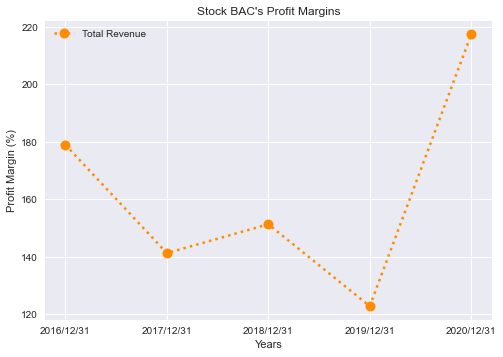

In [32]:
#Gets the Net Profit Margin Year over Year
profitMargins = [100 * (IncomeDataFrame['Net_Income'][i] / IncomeDataFrame['Revenue'][i]) for i in range(0,len(IncomeDataFrame['Revenue']),1)]
plt.plot(IncomeDataFrame['Years'],profitMargins,color = 'darkorange',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Total Revenue')

plt.xlabel('Years')
plt.ylabel('Profit Margin (%)')
plt.title("Stock {0}'s Profit Margins".format(user_stock))
plt.legend(loc = 'best',shadow = True)

In [33]:
#Gets the Interest Coverage Ratio Timeseries
try:
    coverageRatio = []
    for val in range(0,len(IncomeDataFrame['Years']),1):
        numerator = IncomeDataFrame["Net_Income"][val] + IncomeDataFrame["Income_Tax"][val] + IncomeDataFrame["Interest_Expense"][val]
        denominator = IncomeDataFrame['Interest_Expense'][val]
        coverageRatio.append((numerator/denominator))

    #Plots the coverage ratio
    plt.plot(IncomeDataFrame['Years'],coverageRatio,color = 'darkorange',
             linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Coverage Ratio')

    plt.xlabel('Years')
    plt.ylabel('Interest Coverage Ratio')
    plt.title("Stock {0}'s Interest Coverage Ratio".format(user_stock))
    plt.legend(loc = 'best',shadow = True)
    plt.hlines(1.5,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'mediumseagreen')
except:
    pass

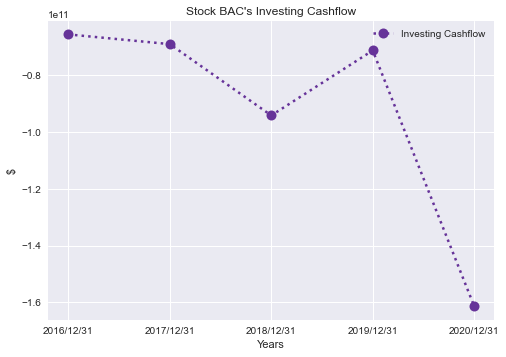

In [34]:
#Now to get the graphs for the investing cashflow 
plt.plot(years,CashFlowDataFrame['Net_Investing_Cashflow'],color = 'rebeccapurple',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Investing Cashflow')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Investing Cashflow".format(user_stock))
plt.legend(loc = 'best',shadow = True)

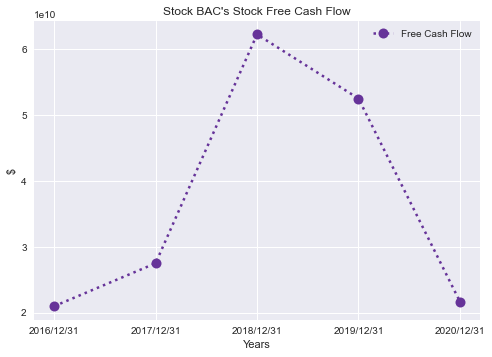

In [35]:
plt.plot(years,CashFlowDataFrame['Free_Cash_Flow'],color = 'rebeccapurple',
         linewidth = 2.5,marker = '.',markersize = 20, linestyle = 'dotted', label = 'Free Cash Flow')

plt.xlabel('Years')
plt.ylabel('$')
plt.title("Stock {0}'s Stock Free Cash Flow".format(user_stock))
plt.legend(loc = 'best',shadow = True)

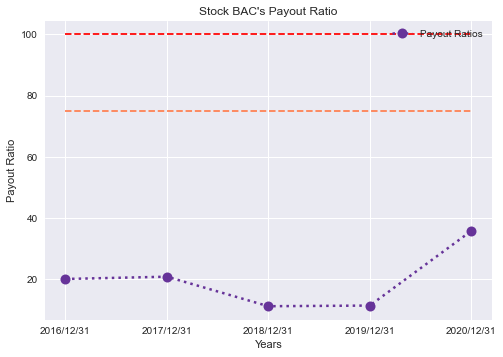

In [36]:
# Shows the payout ratio over time
payoutRatios = (abs(CashFlowDataFrame['Dividends']) / CashFlowDataFrame['Free_Cash_Flow'] ) * 100

plt.plot(years,payoutRatios,color = 'rebeccapurple',linewidth = 2.5,marker = '.',
         markersize = 20, linestyle = 'dotted', label = 'Payout Ratios')
plt.title("Stock {0}'s Payout Ratio".format(user_stock))
plt.xlabel('Years')
plt.ylabel('Payout Ratio')
plt.legend(loc = 'best',shadow = True)
plt.hlines(100,xmin = years[0] , xmax = years[4],linestyle = 'dashed',color = 'red')
plt.hlines(75,xmin =years[0] ,xmax = years[4],linestyle = 'dashed',color = 'coral')

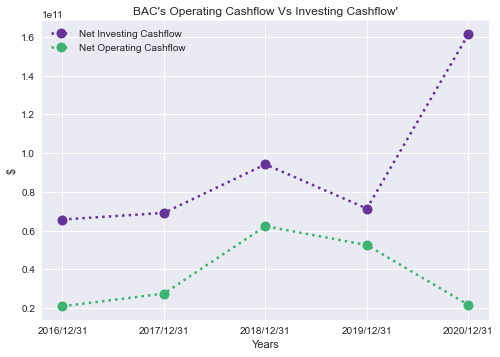

In [37]:
#Net Investing Cashflow Vs Net Operating Cashflow
plt.plot(years,abs(CashFlowDataFrame['Net_Investing_Cashflow']),linewidth = 2.5,marker = '.',color = 'rebeccapurple',
         markersize = 20, linestyle = 'dotted',label = 'Net Investing Cashflow')
plt.plot(years,CashFlowDataFrame['Net_Operating_Cashflow'],linewidth = 2.5,marker = '.',color = 'mediumseagreen',
         markersize = 20, linestyle = 'dotted',label = 'Net Operating Cashflow')
plt.xlabel('Years')
plt.ylabel('$')
plt.title(f"{user_stock}'s Operating Cashflow Vs Investing Cashflow'")
plt.legend(loc = 'best',shadow = True)

    Years  Dividends
0    2000       1.03
1    2001       1.14
2    2002       1.22
3    2003       1.44
4    2004       1.70
5    2005       1.90
6    2006       2.12
7    2007       2.40
8    2008       2.24
9    2009       0.04
10   2010       0.04
11   2011       0.04
12   2012       0.04
13   2013       0.04
14   2014       0.12
15   2015       0.20
16   2016       0.25
17   2017       0.39
18   2018       0.54
19   2019       0.66
20   2020       0.72


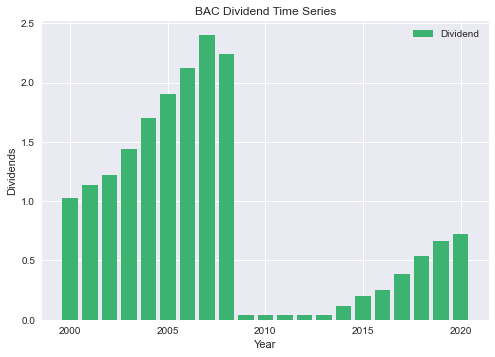

In [38]:
#Now to get the graphs for dividend data
print(dividendData)
plt.bar(dividendData['Years'],dividendData['Dividends'],color = 'mediumseagreen',
        label = 'Dividend',align = 'center')
plt.title(f'{user_stock} Dividend Time Series')
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.legend(loc = 'best',shadow = True)

The 5 Yr Dividend CAGR is: 31.443667443667444


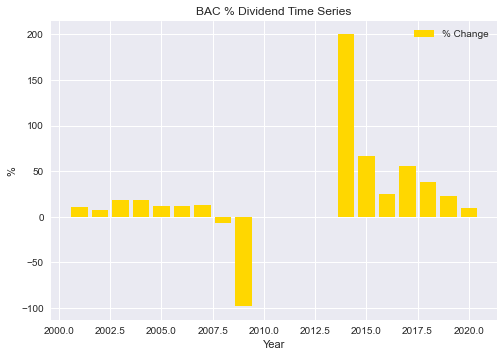

In [39]:
#Percent Change for dividend change
plt.bar(dividendData['Years'],[100* i for i in dividendData['Dividends'].pct_change()],color = 'gold',
        label = '% Change',align = 'center')
plt.title(f'{user_stock} % Dividend Time Series')
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(loc = 'best',shadow = True)
#print([100* i for i in dividendData['Dividends'].pct_change()])

if(len([100* i for i in dividendData['Dividends'].pct_change()]) < 5):
    print('The Dividend CAGR is: ',np.nanmean([100* i for i in dividendData['Dividends'].pct_change()]))
else:
    print('The 5 Yr Dividend CAGR is:',np.nanmean(dividendData['Dividends'][-5:].pct_change()) * 100)

PE Ratio 5 Number Summary: 
count    3648.000000
mean            -inf
std              NaN
min             -inf
25%        10.023536
50%        12.900971
75%        18.408021
max       619.666672
Name: PE, dtype: float64
The Mean PE Ratio:  -inf
The current PE ttm Ratios is:  14.210702902497255


/Users/josecuellargonzalez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/josecuellargonzalez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/Users/josecuellargonzalez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/josecuellargonzalez/opt/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/josecuellargonzalez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


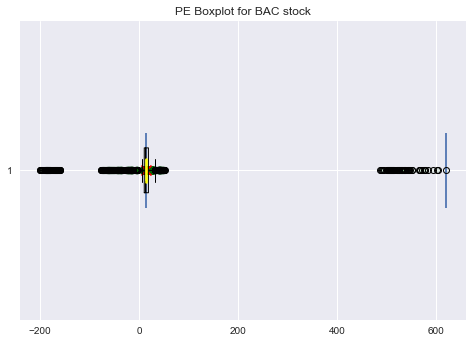

In [40]:
#PE Box plot
PESeq = [1 for i in range(0,len(PEdates['PE']),1)]
plt.boxplot(PEdates['PE'],notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(PEdates['PE'],PESeq,color = 'darkgreen',alpha = .05)
plt.scatter(currPE,1,color = 'r',marker = 'x',s = 100)
plt.violinplot(PEdates['PE'],vert = False, showmedians = True)
plt.title(f'PE Boxplot for {user_stock} stock')

print('PE Ratio 5 Number Summary: ') 
print(pd.Series(PEdates['PE']).describe())
print("The Mean PE Ratio: ",statistics.mean(PEdates['PE']))
print("The current PE ttm Ratios is: ",currPE)

The PB Ratio 5 number Summary: 
count    3838.000000
mean        1.104540
std         2.110109
min         0.088977
25%         0.571429
50%         0.746898
75%         1.078848
max        17.549356
dtype: float64
The Mean PB Ratio:  1.1045397500431489
The current PB Ratio is:  1.3013783056191974


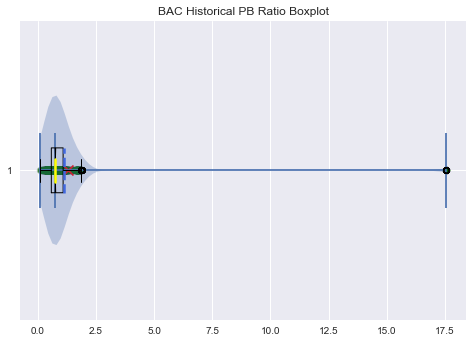

In [41]:
#PB Ratio Boxplot
PBSeq = [1 for i in range(0,len(pbs),1)]

##BoxPlots for PB ratios

#PE Boxplot
plt.boxplot(pbs, notch = True,vert = False,showmeans = True,meanline = True,
                 meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
plt.scatter(pbs,PBSeq,color = 'darkgreen',alpha = .05)
plt.title('{0} Historical PB Ratio Boxplot'.format(user_stock))
plt.scatter(currPB,1,color = 'r',marker = 'x',s = 100)

#PE Violinplot
plt.violinplot(pbs,vert = False, showmedians = True)

print("The PB Ratio 5 number Summary: ")
print(pd.Series(pbs).describe())
print("The Mean PB Ratio: ",statistics.mean(pbs))
print("The current PB Ratio is: ",currPB)

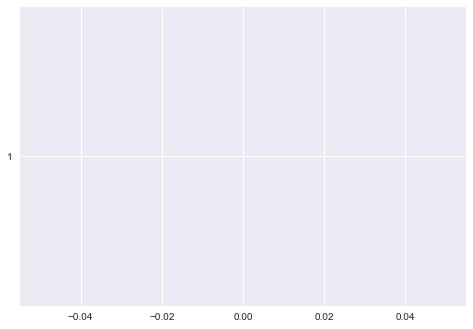

In [42]:
#Make FFO for REITs
try:
    PffoSeq = [1 for i in range(0,len(pFFO[1:]),1)]
    plt.boxplot(pFFO[1:],notch = True,vert = False,showmeans = True,meanline = True,
                     meanprops = dict(linestyle = '--',linewidth = '2.5',color = 'royalblue'),
                    medianprops = dict(linestyle = '-',linewidth = '2.5',color = 'yellow'))
    
    plt.scatter(pFFO[1:],PffoSeq,color = 'darkgreen',alpha = .05)
    plt.scatter(pffo,1,color = 'r',marker = 'x',s = 100)
    plt.violinplot(pFFO[1:],vert = False, showmedians = True)
    plt.title(f'P/FFO Boxplot for {user_stock} stock')

    print('P/FFO Ratio 5 Number Summary: ') 
    print(pd.Series(pFFO[1:]).describe())
    print("The Mean P/FFO Ratio: ",np.nanmean(pFFO[1:]))
    print("The Current P/FFO is: ", pffo)
except:
    pass

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

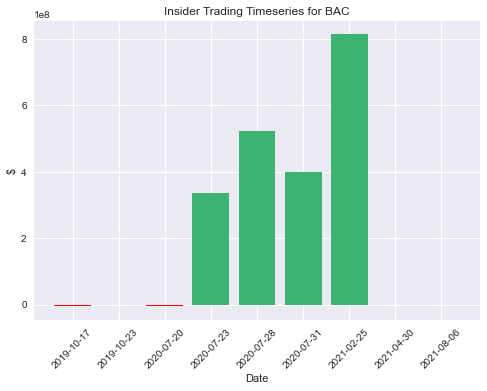

In [43]:
#Gets the bar chart for Insider Trading
plt.bar(insiderDF['Date'],insiderDF['Exchange'],color = insiderDF['Color'])
plt.xlabel('Date')
plt.ylabel('$')
plt.title(f'Insider Trading Timeseries for {user_stock}')
plt.xticks(rotation = 45)